# Decision Trees and Random Forests 

## Import Libraries

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get the Data

In [9]:
df = pd.read_csv('kyphosis.csv')

In [10]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


In [12]:
df.describe()

,Age,Number,Start
count,81.000000,81.000000,81.000000
mean,83.654321,4.049383,11.493827
std,58.104251,1.619423,4.883962
min,1.000000,2.000000,1.000000
25%,26.000000,3.000000,9.000000
50%,87.000000,4.000000,13.000000
75%,130.000000,5.000000,16.000000
max,206.000000,10.000000,18.000000


## EDA


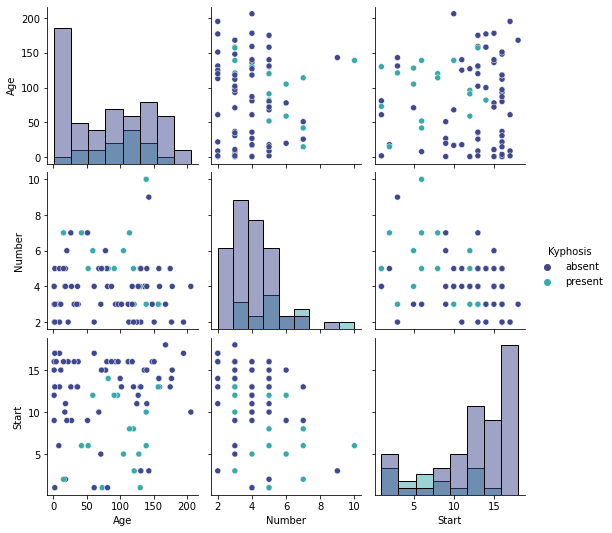

In [17]:
sns.pairplot(df,hue='Kyphosis',diag_kind='hist',palette='mako')

## Train Test Split


In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X = df.drop('Kyphosis',axis=1)
y = df['Kyphosis']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

## Decision Trees


In [21]:
from sklearn.tree import DecisionTreeClassifier

In [22]:
dtree = DecisionTreeClassifier()

In [23]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

## Prediction and Evaluation 


In [24]:
pred  = dtree.predict(X_test)

In [25]:
from sklearn.metrics import classification_report, confusion_matrix

In [26]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

      absent       0.95      0.87      0.91        23
     present       0.25      0.50      0.33         2

    accuracy                           0.84        25
   macro avg       0.60      0.68      0.62        25
weighted avg       0.90      0.84      0.86        25



In [27]:
print(confusion_matrix(y_test,pred))

[[20  3]
 [ 1  1]]


## Random Forests

Now let's compare the decision tree model to a random forest.

In [28]:
from sklearn.ensemble import RandomForestClassifier

In [29]:
rfc=RandomForestClassifier(n_estimators=100)

In [30]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [31]:
rfc_pred = rfc.predict(X_test)

In [32]:
print(confusion_matrix(y_test,rfc_pred))

[[22  1]
 [ 1  1]]


In [33]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

      absent       0.96      0.96      0.96        23
     present       0.50      0.50      0.50         2

    accuracy                           0.92        25
   macro avg       0.73      0.73      0.73        25
weighted avg       0.92      0.92      0.92        25

